# **Fundamentals of Data Analysis Project**

---

**Author: Damien Farrell**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import jupyter_black

jupyter_black.load()
sns.set_theme()

## **Introduction**

The [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), accessible through the UCI Machine Learning Repository, is part of a vast array of databases utilised by the machine learning community to conduct evaluations of machine learning algorithms. 

The Iris dataset is frequently employed in pattern recognition learning. This multivariate dataset's default machine learning task is classification. It contains 150 instances with five attributes, four of which represent sepal and petal measurements for each data point, while the fifth attribute indicates the class or species of Iris plant to which each data point belongs. 

The dataset encompasses 50 plants from each of the three Iris plant classes, with each class representing a distinct species: Iris Setosa, Iris Versicolor, and Iris Virginica. It was originally created by R.A. Fisher in 1936 and was donated by Michael Marshall in 1988.

<p float="left">
    <img src="./img/Iris_Versicolor.jpg" width="20%" height="20%">
    <img src="./img/Iris_Virginica.jpg" width="20%" height="20%">
    <img src="./img/Iris_Setosa.jpg" width="40%" height="40%">
</p>

In [2]:
url_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_headers = [
    "Sepal_Length",
    "Sepal_Width",
    "Petal_Length",
    "Petal_Width",
    "Class",
]

df = pd.read_csv(url_name, header=None, names=column_headers)

df["Class"] = df["Class"].astype("category")

In [3]:
df.dtypes

Sepal_Length     float64
Sepal_Width      float64
Petal_Length     float64
Petal_Width      float64
Class           category
dtype: object

In [4]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **Discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.**

**Types of Variables:**

*Sepal Length (Numerical Variable):* <br>
- This variable represents the sepal length of an iris flower. It is a numerical variable which which has a floating-point data type. 
- It has a ratio scale of measurement as is a continuous numerical variable that has a true zero point (0 mm represents the absence of sepal length), and it supports all arithmetic operations, including addition, subtraction, multiplication, and division.
- It is a continuous statistical distribution.

*Sepal Width (Numerical Variable):* <br>
- This variable represents the sepal width of an iris flower. It is a numerical variable which which has a floating-point data type. 
- It has a ratio scale of measurement as is a continuous numerical variable that has a true zero point.
- It is a continuous statistical distribution.

*Petal Length (Numerical Variable):* <br>
- This variable represents the length of a sepal of a flower. It is a numerical variable which which has a floating-point data type. 
- It has a ratio scale of measurement as is a continuous numerical variable that has a true zero point.
- It is a continuous statistical distribution.

*Petal Width (Numerical Variable):* <br>
- This variable represents the length of a sepal of a flower. It is a numerical variable which which has a floating-point data type. 
- It has a ratio scale of measurement as is a continuous numerical variable that has a true zero point.
- It is a continuous statistical distribution.

*Class (Categorical Variable):* <br>
- This variable represents the class of the iris flower, and it is categorical nominal scale variable. It is not ordinal because the iris class names are categories without a specific order.
- It has three possible categories: Setosa, Versicolor, and Virginica. In the imported dataframe it is an object which contain strings. A dataframe object is a catch-all data type that can represent various types of data. This variable was  typecast as a Pandas categorical variable.
- It is a discete statistical distribution.

---

### **Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.**

#### **Variable Distributions**

In [5]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.groupby(["Class"]).agg(["mean", "max", "min"])

Sepal_Length           Sepal_Width           Petal_Length  \
                        mean  max  min        mean  max  min         mean   
Class                                                                       
Iris-setosa            5.006  5.8  4.3       3.418  4.4  2.3        1.464   
Iris-versicolor        5.936  7.0  4.9       2.770  3.4  2.0        4.260   
Iris-virginica         6.588  7.9  4.9       2.974  3.8  2.2        5.552   

                          Petal_Width            
                 max  min        mean  max  min  
Class                                            
Iris-setosa      1.9  1.0       0.244  0.6  0.1  
Iris-versicolor  5.1  3.0       1.326  1.8  1.0  
Iris-virginica   6.9  4.5       2.026  2.5  1.4

#### **Variable Relationships**

In [7]:
df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].corr(
    method="pearson", min_periods=1
)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


---

### **Select, demonstrate, and explain the most appropriate plot(s) for each variable.**

#### **Variable Distributions**

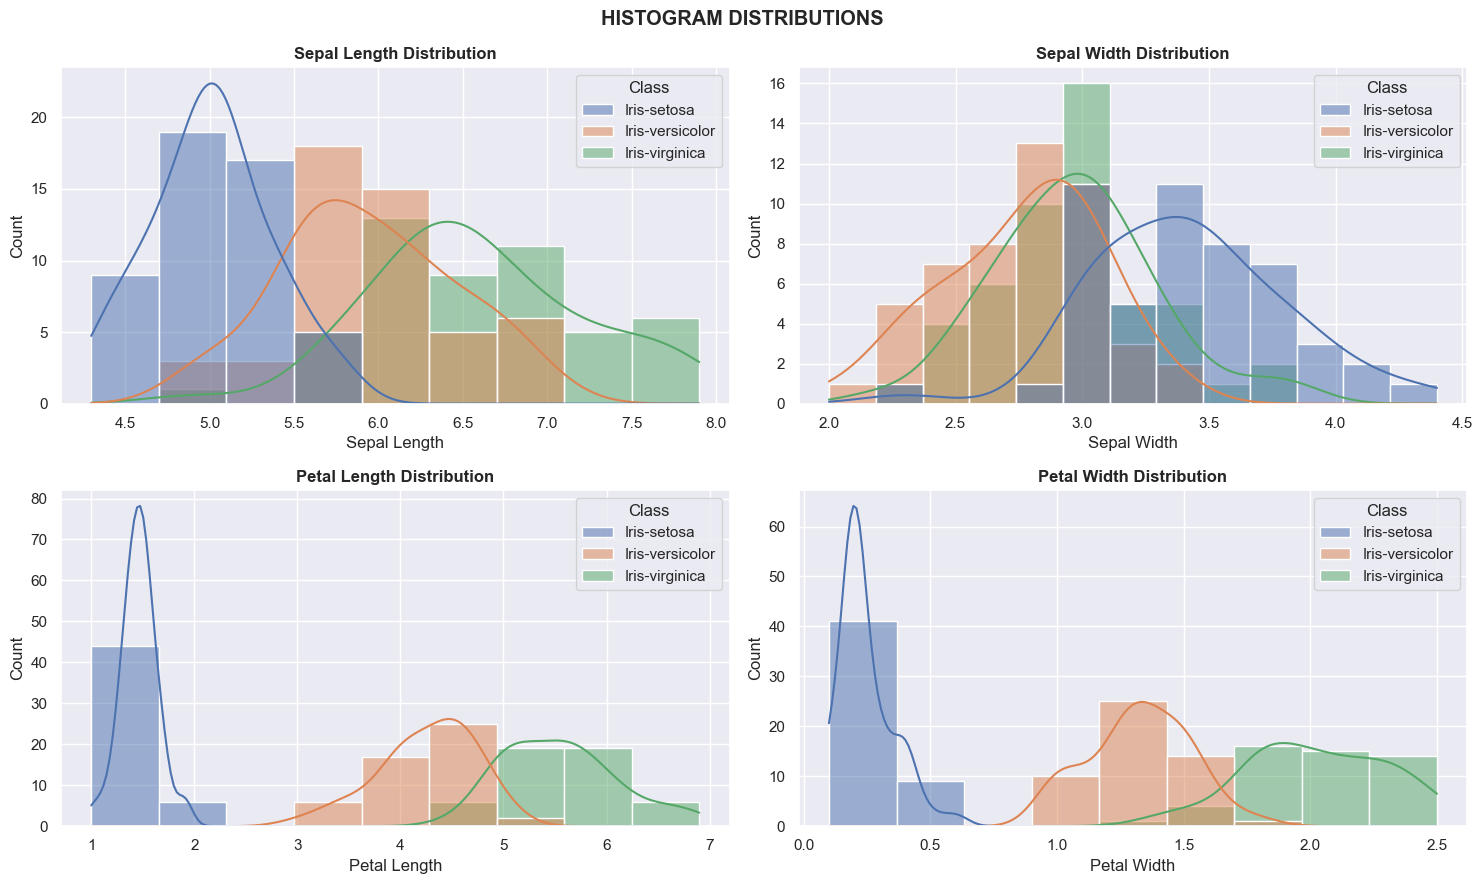

In [8]:
figure, axes = plt.subplots(2, 2, figsize=(15, 9))
figure.suptitle("HISTOGRAM DISTRIBUTIONS", fontweight="bold")

sns.histplot(x=df["Sepal_Length"], kde=True, ax=axes[0, 0], hue=df["Class"])
axes[0, 0].set_title("Sepal Length Distribution", fontweight="bold")
axes[0, 0].set_xlabel("Sepal Length")

sns.histplot(x=df["Sepal_Width"], kde=True, ax=axes[0, 1], hue=df["Class"])
axes[0, 1].set_title("Sepal Width Distribution", fontweight="bold")
axes[0, 1].set_xlabel("Sepal Width")

sns.histplot(x=df["Petal_Length"], kde=True, ax=axes[1, 0], hue=df["Class"])
axes[1, 0].set_title("Petal Length Distribution", fontweight="bold")
axes[1, 0].set_xlabel("Petal Length")

sns.histplot(x=df["Petal_Width"], kde=True, ax=axes[1, 1], hue=df["Class"])
axes[1, 1].set_title("Petal Width Distribution", fontweight="bold")
axes[1, 1].set_xlabel("Petal Width")

plt.tight_layout()

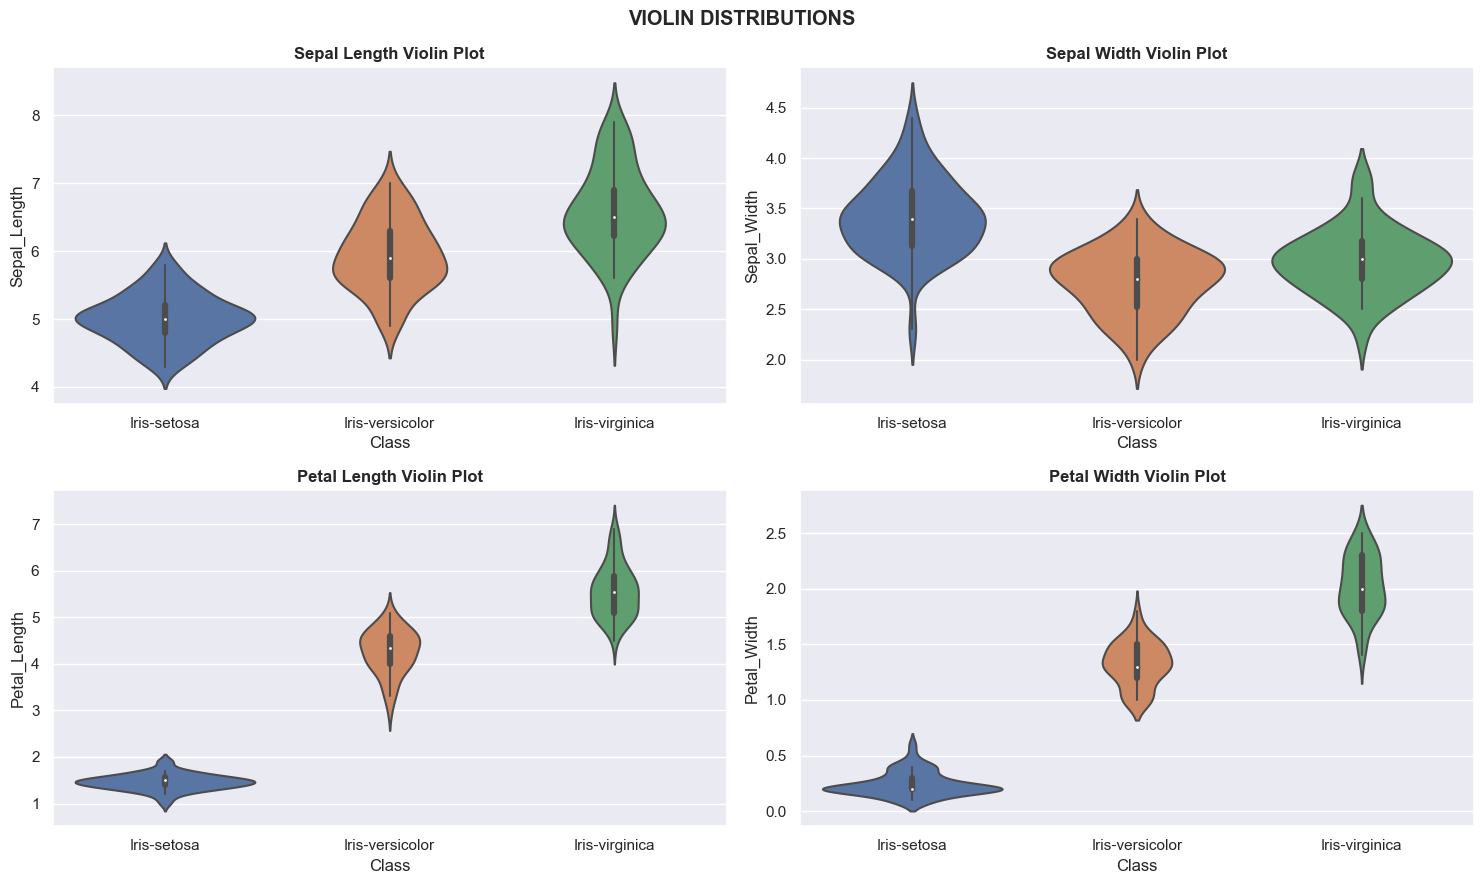

In [9]:
figure, axes = plt.subplots(2, 2, figsize=(15, 9))
figure.suptitle("VIOLIN DISTRIBUTIONS", fontweight="bold")

sns.violinplot(data=df, x="Class", y="Sepal_Length", ax=axes[0, 0])
axes[0, 0].set_title("Sepal Length Violin Plot", fontweight="bold")

sns.violinplot(data=df, x="Class", y="Sepal_Width", ax=axes[0, 1])
axes[0, 1].set_title("Sepal Width Violin Plot", fontweight="bold")

sns.violinplot(data=df, x="Class", y="Petal_Length", ax=axes[1, 0])
axes[1, 0].set_title("Petal Length Violin Plot", fontweight="bold")

sns.violinplot(data=df, x="Class", y="Petal_Width", ax=axes[1, 1])
axes[1, 1].set_title("Petal Width Violin Plot", fontweight="bold")

plt.tight_layout()

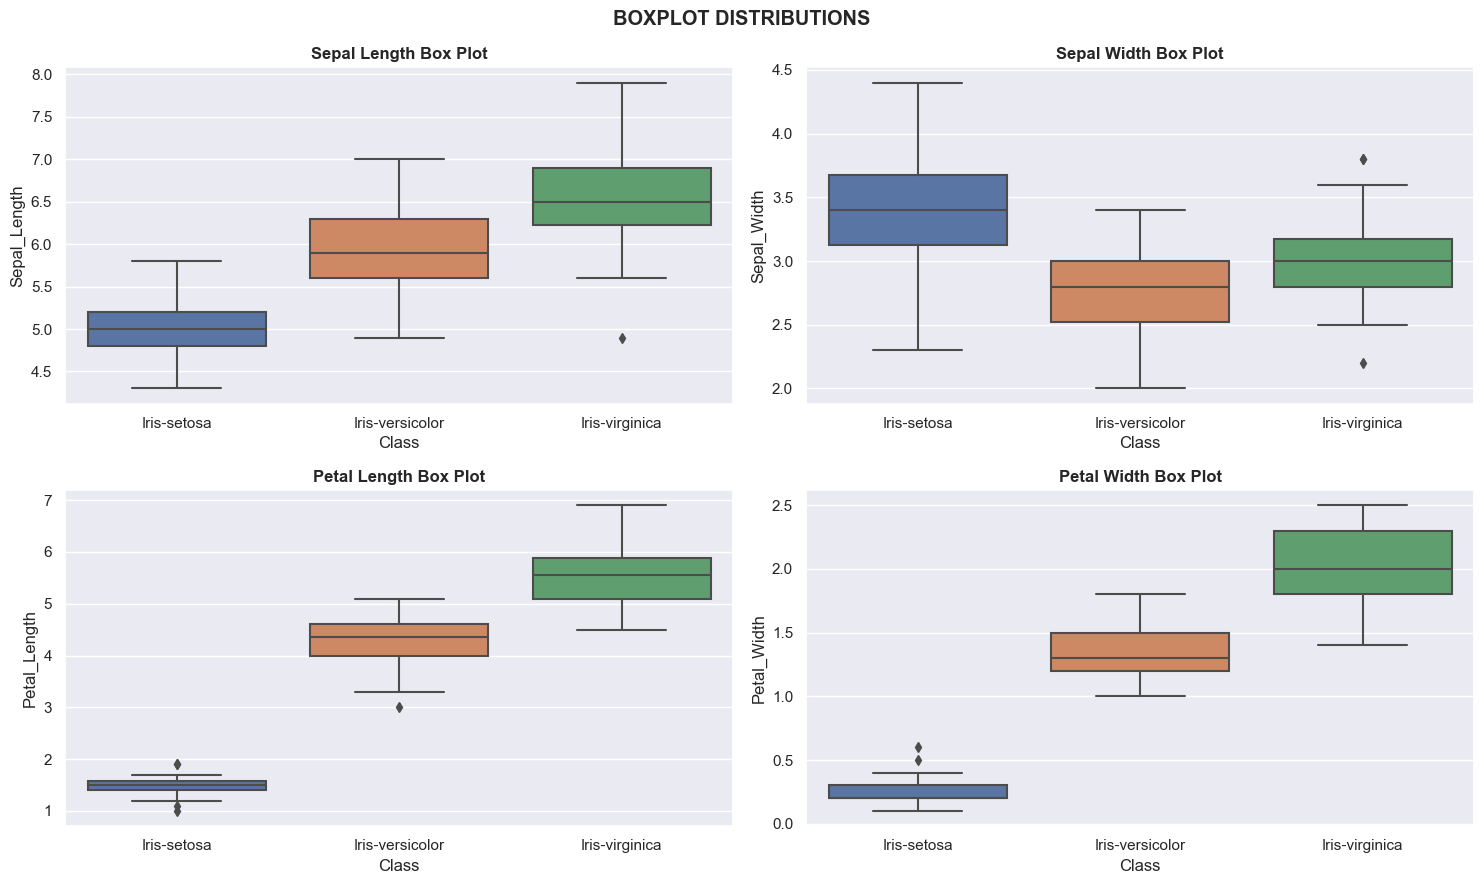

In [10]:
figure, axes = plt.subplots(2, 2, figsize=(15, 9))
figure.suptitle("BOXPLOT DISTRIBUTIONS", fontweight="bold")

sns.boxplot(data=df, x="Class", y="Sepal_Length", ax=axes[0, 0])
axes[0, 0].set_title("Sepal Length Box Plot", fontweight="bold")

sns.boxplot(data=df, x="Class", y="Sepal_Width", ax=axes[0, 1])
axes[0, 1].set_title("Sepal Width Box Plot", fontweight="bold")

sns.boxplot(data=df, x="Class", y="Petal_Length", ax=axes[1, 0])
axes[1, 0].set_title("Petal Length Box Plot", fontweight="bold")

sns.boxplot(data=df, x="Class", y="Petal_Width", ax=axes[1, 1])
axes[1, 1].set_title("Petal Width Box Plot", fontweight="bold")

plt.tight_layout()

#### **Variable Relationships**

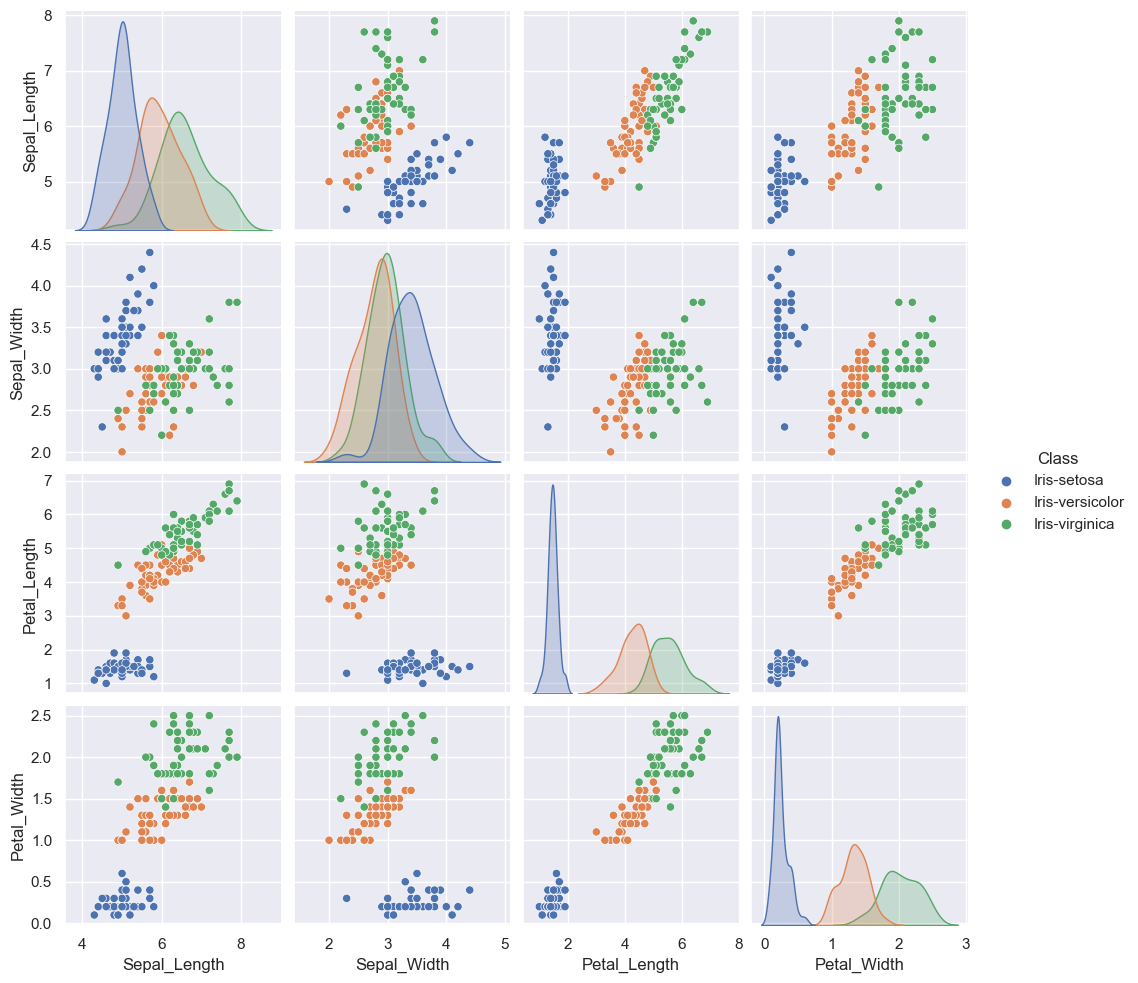

In [11]:
sns.pairplot(df, vars=df.columns[:-1], hue="Class");

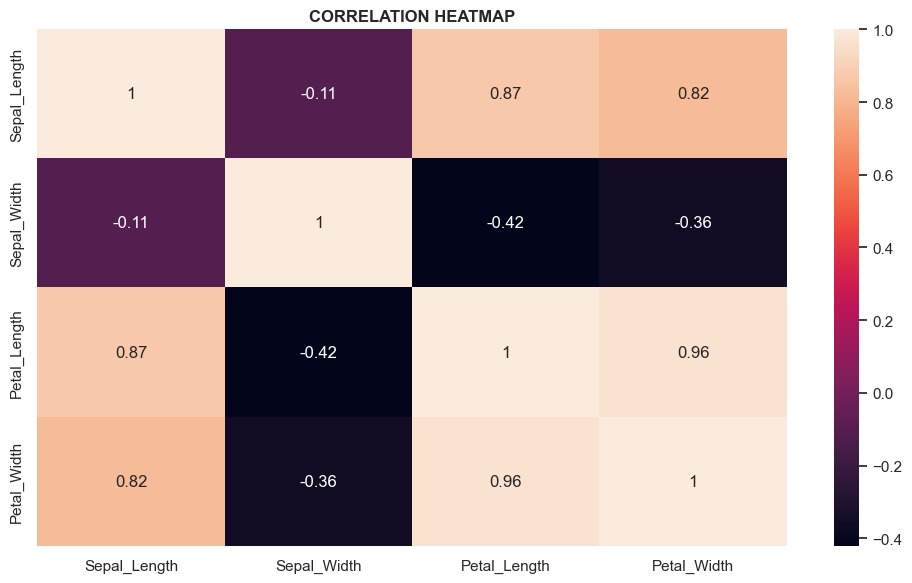

In [12]:
df_corr = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True)
plt.title("CORRELATION HEATMAP", fontweight="bold")
plt.tight_layout()

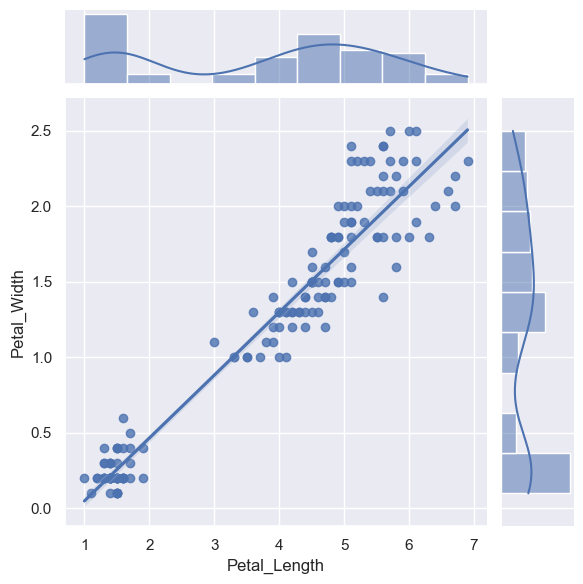

In [13]:
sns.jointplot(data=df, x="Petal_Length", y="Petal_Width", kind="reg");

---
## **References**

1. [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html)
1. [Distribution of a categorical variable](https://prvnk10.medium.com/distribution-of-a-categorical-variable-a0628b605e3d)
1. [Python Charts](https://python-charts.com/)
1. [Ten must-know Seaborn Plot](https://www.kaggle.com/code/snehagilada/ten-must-know-seaborn-plots)


---

# End